<a href="https://colab.research.google.com/github/andredallacosta/calculo-numerico/blob/master/Lista_2_Num%C3%A9rico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Nome: André Zucchetti Dalla Costa   ---- Trabalho 1]




## [Imports e Funções Auxiliares]

In [ ]:
import math
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
x = sym.Symbol('x')

In [ ]:
def plotMethod(f, inicio, fim, vetor=[], metodo=''):

  numero_pontos = 100
  curve = np.linspace(inicio, fim, numero_pontos+1)
  values = [f(value) for value in curve]
  
  x_aproximado = [f(value) for value in vetor]

  plt.plot(curve, values, linestyle='-')
  plt.plot(vetor, x_aproximado, 'x', marker='.', label='' + str(len(vetor)) + ' iterações' )

  leg = plt.legend();

  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.title(metodo)

  plt.axhline(0, color = "black")
  plt.grid()
  plt.show()

## [Método da Bissecção]

In [ ]:
def bisseccao(f, a, b, epsilon=0, max_iteracoes=0, plot=True):    
  eixo_x = a
  eixo_y = b
  
  raizes = []
  k = 1
  
  if (f(a) * f(b)) < 0:
    x = (a + b) / 2
    raizes.append(x)
    
    if (max_iteracoes > 0):
      while(k < max_iteracoes):
        if (f(a) * f(x) < 0):
          b = x
        else:
          a = x
        x = (a + b) / 2
        raizes.append(x)
        k += 1
 
    else:
      while(abs(f(x)) > epsilon and k <= 500):
        if (f(a) * f(x) < 0):
          b = x
        else:
          a = x
        x = (a + b) / 2
        raizes.append(x)
        k += 1
      
    print("A raiz no intervalo é: ", x)
    if (plot):
      plotMethod(f, eixo_x, eixo_y, raizes, "Método da Bissecção")
    else:
      print("Número de iterações: ", len(raizes))
  else:
    print("Não existem raizes no intervalo [", a, ", ", b, "]")

A raiz no intervalo é:  0.578125


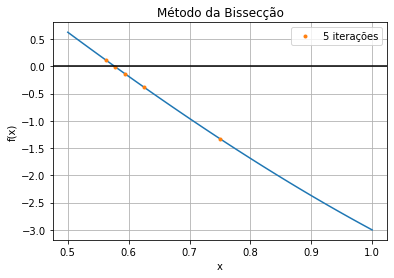

In [ ]:
# Teste
f = lambda x: pow(x, 3) - 9*x + 5
bisseccao(f, 0.5, 1, epsilon=1e-2)

## [Método da Falsa Posição]

In [ ]:
def falsa_posicao(f, a, b, epsilon=0, max_iteracoes=0, plot=True):  

  eixo_x = a
  eixo_y = b
  raizes = []
  k = 1
  
  if (f(a) * f(b)) < 0:
    x = (a*f(b) - b*f(a)) / (f(b)-f(a))
    raizes.append(x)
    
    if (max_iteracoes > 0):
      while (k < max_iteracoes):
        if (f(a) * f(b) < 0):
          b = x
        else:
          a = x
        x = (a*f(b) - b*f(a)) / (f(b)-f(a))
        raizes.append(x)
        k += 1

    else:
      while (abs(f(x)) > epsilon and k <= 500):
        if (f(a) * f(b) < 0):
          b = x
        else:
          a = x
        x = (a*f(b) - b*f(a)) / (f(b)-f(a))
        raizes.append(x)
        k += 1
    
    print("A raiz no intervalo é: ", x)
    if (plot):
      plotMethod(f, eixo_x, eixo_y, raizes, "Método da Falsa Posição")
    else:
      print("Número de iterações: ", len(raizes))
  else:
    print("Não existem raizes no intervalo [", a, ", ", b, "]")

A raiz no intervalo é:  0.5769104705239562


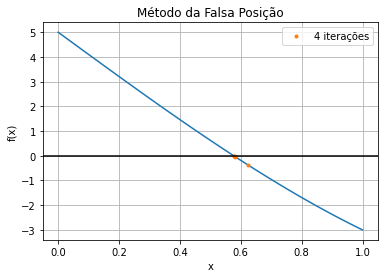

In [ ]:
# Teste
f = lambda x: pow(x, 3) - 9*x + 5
falsa_posicao(f, 0, 1, epsilon=5e-4)

## [Método da Tangente]

In [ ]:
def tangente(f, d, x, epsilon=0, max_iteracoes=0, plot=True):  

  eixo_x = -5
  eixo_y = 5
  raizes = []
  raizes.append(x)
  
  if (abs(f(x)) >= epsilon): 
    x = x - (f(x)/(d.subs(sym.Symbol('x'), x)))
    k = 1

    if (max_iteracoes > 0):
      while (k < max_iteracoes):
        raizes.append(x)
        x = x - (f(x)/(d.subs(sym.Symbol('x'), x)))
        k += 1
  
    else:
      while (abs(f(x)) > epsilon and k <= 500):
        raizes.append(x)
        x = x - (f(x)/(d.subs(sym.Symbol('x'), x)))
        k += 1
    
  try:
    print("A raiz é: ", x.evalf())
  except AttributeError:
    print("A raiz é: ", x)
  if (plot):
    plotMethod(f, eixo_x, eixo_y, raizes, "Método da Tangente")
  else:
      print("Número de iterações: ", len(raizes))

A raiz é:  0.337415141172970


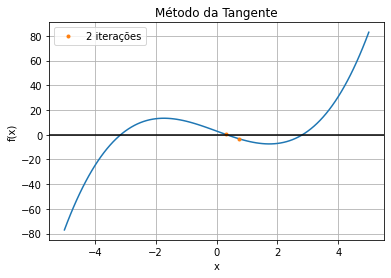

In [ ]:
# Teste
f = lambda x: pow(x, 3) - 9*x + 3
d = sym.diff((pow(x, 3) - 9*x + 3), x)
tangente(f, d, 0.75, epsilon=10e-2)

In [ ]:
# Na questão 6-a) e 6-b) o sympy estava me retornando um erro, então fiz uma versão sem usá-lo
def tangente_without_sympy(f, d, x, epsilon=0, max_iteracoes=0, plot=True):  

  eixo_x = -5
  eixo_y = 5
  raizes = []
  raizes.append(x)
  
  if (abs(f(x)) >= epsilon): 
    x = x - (f(x)/d(x))
    k = 1

    if (max_iteracoes > 0):
      while (k < max_iteracoes):
        raizes.append(x)
        x = x - (f(x)/d(x))
        k += 1
  
    else:
      while (abs(f(x)) > epsilon and k <= 500):
        raizes.append(x)
        x = x - (f(x)/d(x))
        k += 1
    
  try:
    print("A raiz é: ", x.evalf())
  except AttributeError:
    print("A raiz é: ", x)
  if (plot):
    plotMethod(f, eixo_x, eixo_y, raizes, "Método da Tangente")
  else:
      print("Número de iterações: ", len(raizes))

## [Método da Secante]

In [ ]:
def secante(f, x0, x1, epsilon=0, max_iteracoes=0, plot=True):  

  eixo_x = x0
  eixo_y = x1
  raizes = [] 
  k = 1

  if (abs(f(x0)) < epsilon):
    raizes.append(x0)  
    print("A raiz no intervalo é: ", x0)
  
  else:
    raizes.append(x1)

    if (max_iteracoes > 0):
      while (k < max_iteracoes):
        tmp = x1  
        x1 = x1 - ((f(x1) / (f(x1) - f(x0))) * (x1 - x0))
        x0 = tmp
        raizes.append(x1)
        k += 1

    else:
      while (abs(f(x1)) >= epsilon and k <= 500):
        tmp = x1  
        x1 = x1 - ((f(x1) / (f(x1) - f(x0))) * (x1 - x0))
        x0 = tmp
        raizes.append(x1)
        k += 1

    try:
      print("A raiz é: ", x1.evalf())
    except AttributeError:
      print("A raiz é: ", x1)
  if (plot):
    plotMethod(f, eixo_x, eixo_y, raizes, "Método da Secante")
  else:
      print("Número de iterações: ", len(raizes))

A raiz é:  1.997737556561086


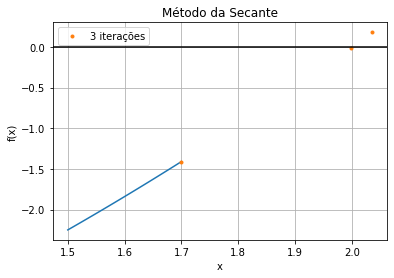

In [ ]:
# Teste
f = lambda x: pow(x, 2) + x - 6
secante(f, 1.5, 1.7, 10e-2)

## [Questão 1]

Determine a raiz da função f(x) = – 12 – 21x + 18x² – 2.75x³ com o método da bissecção e da falsa posição. Utilize as aproximações iniciais a = -1 e b = 0 e um critério de parada de 1%.

A raiz no intervalo é:  -0.41455078125


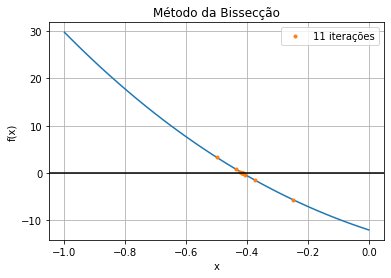

A raiz no intervalo é:  -0.41451224401228687


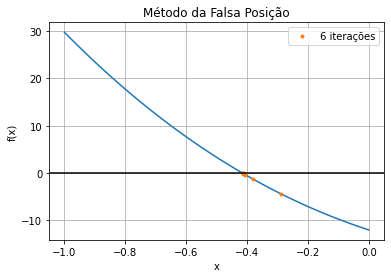

In [ ]:
f = lambda x: -12 - 21*x + 18 * pow(x, 2) - 2.75 * pow(x, 3)
bisseccao(f, -1, 0, 0.01)
falsa_posicao(f, -1, 0, 0.01)

## [Questão 2]

Determine a raiz da função f(x) = ln(x²) - 0.7 com o método da bissecção e da falsa posição. Utilize três iterações e as aproximações iniciais a = 0.5 e b = 2.

A raiz no intervalo é:  1.4375


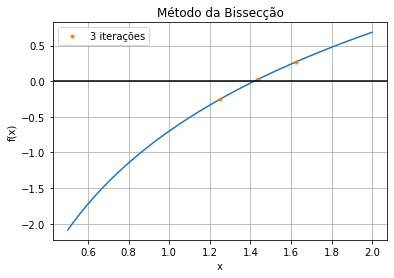

A raiz no intervalo é:  1.4483985429092026


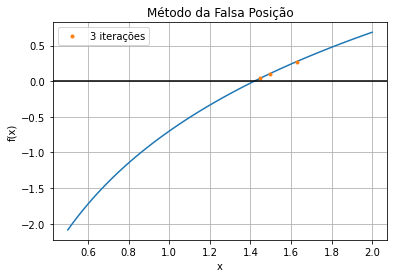

In [ ]:
f = lambda x: math.log(pow(x, 2)) - 0.7
bisseccao(f, 0.5, 2, max_iteracoes=3)
falsa_posicao(f, 0.5, 2, max_iteracoes=3)

## [Questão 3]

Determine a maior raiz real de f(x) = 0.95x³ - 5.9x² + 10.9x – 6

a) Graficamente

b) Usando o método da tangente (três iterações, x0 = 3.5)

c) Usando o método da secante (três iterações, x0 = 2.5 e x1= 3.5)

In [ ]:
f = lambda x: 0.95*pow(x, 3) - 5.9*pow(x, 2) + 10.9*x - 6
d = sym.diff((0.95*pow(x, 3) - 5.9*pow(x, 2) + 10.9*x - 6), x)

Avaliando graficamente, pode se dizer que uma aproximação da raiz é 3.3


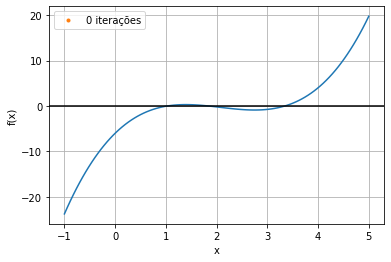

In [ ]:
# a)
print("Avaliando graficamente, pode se dizer que uma aproximação da raiz é 3.3")
plotMethod(f, -1, 5)

A raiz é:  3.34464543173747


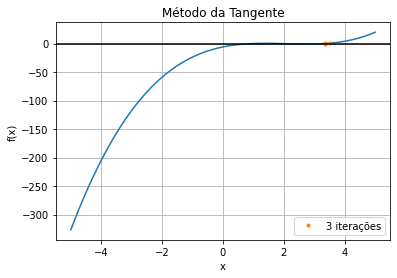

In [ ]:
# b)
tangente(f, d, 3.5, max_iteracoes=3)

A raiz é:  3.29190623725681


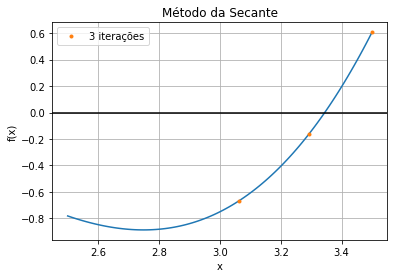

In [ ]:
# c)
secante(f, 2.5, 3.5, max_iteracoes=3)

## [Questão 4]

Determine a menor raiz real de f(x) = 8sen(x)e^-x - 1

a) Graficamente

b) Usando o método da tangente (três iterações, x0 = 0.3)

c) Usando o método da secante (três iterações, x0 = 0.5 e x1= 0.4)

In [ ]:
f = lambda x: 8 * math.sin(x) * math.exp(-1 * x) - 1
d = sym.diff((8 * sym.sin(x) * sym.exp(-1 * x) - 1), x)

Avaliando graficamente, pode se dizer que uma aproximação da menor raiz é 0.2


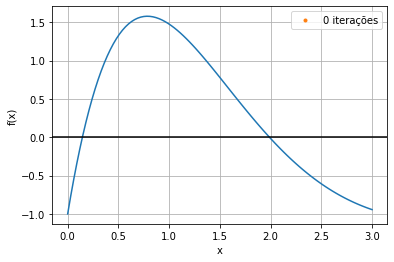

In [ ]:
# a)
print("Avaliando graficamente, pode se dizer que uma aproximação da menor raiz é 0.2")
plotMethod(f, 0, 3)

A raiz é:  0.145012084315025


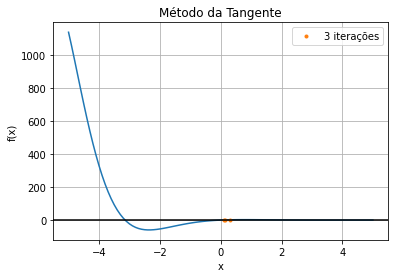

In [ ]:
# b)
tangente(f, d, 0.3, max_iteracoes=3)

A raiz é:  0.20659827709548462


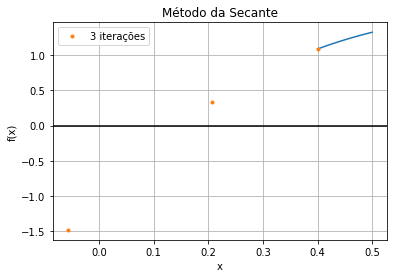

In [ ]:
# c)
secante(f, 0.5, 0.4, max_iteracoes=3)

## [Questão 5]

O polinômio p(x) = x⁵ – 10/3x³ + 5/21x tem suas cinco raízes, todas no
intervalo [-1, 1]

a) Verifique que x1 ∈ [-1, -0.75], x2 ∈ [-0.75, -0.25], x3 ∈ [-0.25, 0.25], x4 ∈ [0.3,0.8], x5∈[0.8, 1]

b) Encontre as raízes utilizando os método elencados abaixo, usando epsilon = 10^-5

x1: Tangente x0 = -0.8

x2: Bissecção a = -0.75 e b= -0.25

x3: Falsa Posição a = -0.25 e b= 0.25

x4: Secante x0 = 0.3 e x1= 0.8

In [ ]:
f = lambda x: pow(x, 5) - 10/3 * pow(x, 3) + 5/21 * x
d = sym.diff((pow(x, 5) - 10/3 * pow(x, 3) + 5/21 * x), x)

In [ ]:
# a)
print("--- x1 ∈ [-1, -0.75] --- ")
bisseccao(f, -1, -0.75, max_iteracoes=50, plot=False)
print("\n")

print("--- x2 ∈ [-0.75, -0.25] ---")
bisseccao(f, -0.75, -0.25, max_iteracoes=50, plot=False)
print("\n")

print("--- x3 ∈ [-0.25, 0.25] ---")
bisseccao(f, -0.25, 0.25, max_iteracoes=50, plot=False)
print("\n")

print("--- x4 ∈ [0.3, 0.8] ---")
bisseccao(f, 0.3, 0.8, max_iteracoes=50, plot=False)
print("\n")

print("--- x5 ∈ [0.8, 1] ---")
bisseccao(f, 0.8, 1, max_iteracoes=50, plot=False)
print("\n")

--- x1 ∈ [-1, -0.75] --- 
Não existem raizes no intervalo [ -1 ,  -0.75 ]


--- x2 ∈ [-0.75, -0.25] ---
A raiz no intervalo é:  -0.2702378968380921
Número de iterações:  50


--- x3 ∈ [-0.25, 0.25] ---
A raiz no intervalo é:  0.24999999999999956
Número de iterações:  50


--- x4 ∈ [0.3, 0.8] ---
Não existem raizes no intervalo [ 0.3 ,  0.8 ]


--- x5 ∈ [0.8, 1] ---
Não existem raizes no intervalo [ 0.8 ,  1 ]




In [ ]:
# b)
epsilon = 10e-5

print("--- x1: Tangente x0 = -0.8 ---")
tangente(f, d, -0.8, epsilon=epsilon, plot=False)
print("\n")

print("--- x2: Bissecção a = -0.75 e b= -0.25 ---")
bisseccao(f, -0.75, -0.25, epsilon=epsilon, plot=False)
print("\n")

print("--- x3: Falsa Posição a = -0.25 e b= 0.25 ---")
falsa_posicao(f, -0.25, 0.25, epsilon=epsilon, plot=False)
print("\n")

print("--- x4: Secante x0 = 0.3 e x1= 0.8 ---")
secante(f, 0.3, 0.8, epsilon=epsilon, plot=False)
print("\n")

--- x1: Tangente x0 = -0.8 ---
A raiz é:  -0.270299964668665
Número de iterações:  5


--- x2: Bissecção a = -0.75 e b= -0.25 ---
A raiz no intervalo é:  -0.270263671875
Número de iterações:  11


--- x3: Falsa Posição a = -0.25 e b= 0.25 ---
A raiz no intervalo é:  0.0
Número de iterações:  1


--- x4: Secante x0 = 0.3 e x1= 0.8 ---
A raiz é:  0.27040064514781964
Número de iterações:  5




## [Questão 6]

Compare o desempenho dos métodos da Bissecção, Falsa Posição, Secante
e Tangente nas equações abaixo:

![asdasd](https://uploaddeimagens.com.br/images/002/763/826/original/Screenshot_from_2020-07-11_16-15-18.png?1594494974)

In [ ]:
# a)
f = lambda x: math.exp(-pow(x, 2)) - math.cos(x)
d = lambda x: math.exp(-pow(x, 2))*2*x + math.sin(x)
epsilon = 10e-4

print("--- Bissecção ---")
bisseccao(f, 1, 2, epsilon=epsilon, plot=False)
print("\n")

print("--- Falsa Posição ---")
falsa_posicao(f, 1, 2, epsilon=epsilon, plot=False)
print("\n")

print("--- Tangente ---")
tangente_without_sympy(f, d, 1, epsilon=epsilon, plot=False)
print("\n")

print("--- Secante ---")
secante(f, 1, 2, epsilon=epsilon, plot=False)
print("\n")

--- Bissecção ---
A raiz no intervalo é:  1.447265625
Número de iterações:  9


--- Falsa Posição ---
A raiz no intervalo é:  1.447271932527536
Número de iterações:  5


--- Tangente ---
A raiz é:  1.4460228118547804
Número de iterações:  11


--- Secante ---
A raiz é:  1.4472279182675227
Número de iterações:  5




In [ ]:
# b)
f = lambda x: pow(x, 3) - x - 1
d = sym.diff((pow(x, 3) - x - 1), x)
epsilon = 10e-6

print("--- Bissecção ---")
bisseccao(f, 1, 2, epsilon=epsilon, plot=False)
print("\n")

print("--- Falsa Posição ---")
falsa_posicao(f, 1, 2, epsilon=epsilon, plot=False)
print("\n")

print("--- Tangente ---")
tangente(f, d, 1, epsilon=epsilon, plot=False)
print("\n")

print("--- Secante ---")
secante(f, 1, 2, epsilon=epsilon, plot=False)
print("\n")

--- Bissecção ---
A raiz no intervalo é:  1.3247184753417969
Número de iterações:  18


--- Falsa Posição ---
A raiz no intervalo é:  1.3247177816630842
Número de iterações:  7


--- Tangente ---
A raiz é:  1.32471817399905
Número de iterações:  4


--- Secante ---
A raiz é:  1.3247179653538177
Número de iterações:  7




In [ ]:
# c)
f = lambda x: 4*math.sin(x) - math.exp(x)
d = lambda x: 4*math.cos(x) - math.exp(x)
epsilon = 10e-5

print("--- Bissecção ---")
bisseccao(f, 0, 1, epsilon=epsilon, plot=False)
print("\n")

print("--- Falsa Posição ---")
falsa_posicao(f, 0, 1, epsilon=epsilon, plot=False)
print("\n")

print("--- Tangente ---")
tangente_without_sympy(f, d, 0, epsilon=epsilon, plot=False)
print("\n")

print("--- Secante ---")
secante(f, 0, 1, epsilon=epsilon, plot=False)
print("\n")

--- Bissecção ---
A raiz no intervalo é:  0.37054443359375
Número de iterações:  14


--- Falsa Posição ---
A raiz no intervalo é:  0.37058852288011
Número de iterações:  6


--- Tangente ---
A raiz é:  0.3705576855322359
Número de iterações:  3


--- Secante ---
A raiz é:  0.3705638389164971
Número de iterações:  7




In [ ]:
# d)
f = lambda x: x*math.log(x) - 1
d = sym.diff((x*sym.log(x) - 1), x)
epsilon = 10e-7

print("--- Bissecção ---")
bisseccao(f, 2, 3, epsilon=epsilon, plot=False)
print("\n")

print("--- Falsa Posição ---")
falsa_posicao(f, 2, 3, epsilon=epsilon, plot=False)
print("\n")

print("--- Tangente ---")
tangente(f, d, 2, epsilon=epsilon, plot=False)
print("\n")

print("--- Secante ---")
secante(f, 2, 3, epsilon=epsilon, plot=False)
print("\n")

--- Bissecção ---
Não existem raizes no intervalo [ 2 ,  3 ]


--- Falsa Posição ---
Não existem raizes no intervalo [ 2 ,  3 ]


--- Tangente ---
A raiz é:  1.76322283438428
Número de iterações:  3


--- Secante ---
A raiz é:  1.763222865738391
Número de iterações:  5


